In [62]:
from Circles.circles import circle
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from shapely.geometry import Polygon, MultiPolygon, Point
from descartes import PolygonPatch
import numpy as np

In [63]:
# use the Robinson projection - it'll distort nicely
m = Basemap(resolution='l', projection='robin', lon_0=0)

In [64]:
# let's calculate a 2584-km circle
RADIUS = 2584
centerlon = 0.135875
centerlat = 51.5219198
coords = circle(m, centerlon, centerlat, RADIUS)
casa = Polygon(coords)

In [65]:
# let's do the same with a circle calculated in cartesian coordinates
# http://mitpress.mit.edu/books/road-not-road-and-open-city-ritoque-chile
rlon = -71.530303
rlat = -32.824977
p = Point(m(rlon, rlat))
ritoque = p.buffer(RADIUS * 1000)
# now let's calculate it correctly
ritoque_correct = Polygon(circle(m, rlon, rlat, RADIUS))

In [66]:
# let's calculate a series of concentric circles originating in Perth
plon = 115.9313409
plat = -31.9688837
radii = [144, 233, 377, 610, 987, 1597, 2584, 4181]
e_coords = [circle(m, plon, plat, fib) for fib in radii]
perth = [Polygon(coord) for coord in e_coords]

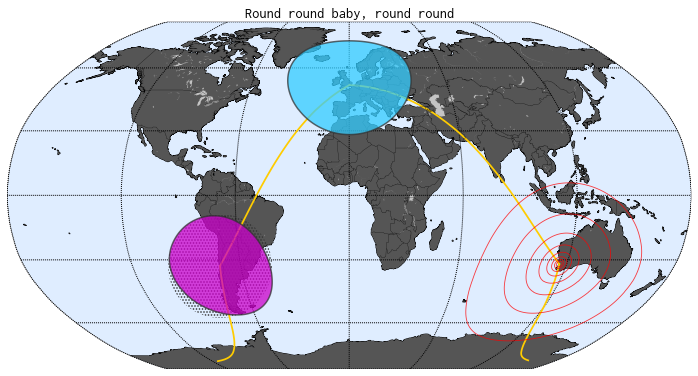

In [67]:
# let's plot everything
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='w', frame_on=False)

cpatch = PolygonPatch(casa, fc='#33CCFF', ec='#333333', lw=1.5, alpha=.75, zorder=2)
rpatch = PolygonPatch(ritoque, fc='none', ec='#333333', lw=0, ls='dotted', hatch='....', zorder=1)
rpatch_correct = PolygonPatch(ritoque_correct, fc='#CC00CC', ec='#333333', lw=1.5, alpha=.75, zorder=2)
# the concentric circles are treated as a PatchCollection
ppatch = PatchCollection(
    [PolygonPatch(poly) for poly in perth],
    color='none', edgecolor='#ff0000', lw=0.85, alpha=0.75, zorder=3)

# draw map features
m.drawmapboundary(fill_color='#dfedff', linewidth=0.25, zorder=0)
m.drawcountries(linewidth=.25, color='#000000', zorder=2)
m.drawcoastlines(linewidth=1., zorder=1)
m.fillcontinents(color='#555555', lake_color='#C4C4C4',zorder=1)
m.drawparallels(np.arange(-90., 120., 30.), alpha=0.5, lw=0.25, zorder=1)
m.drawmeridians(np.arange(0., 360., 60.), alpha=0.5, lw=0.25, zorder=1)


# draw circles
ax.add_patch(cpatch)
ax.add_patch(rpatch)
ax.add_patch(rpatch_correct)
ax.add_collection(ppatch)

# draw great circles - note pert --> ritoque is correct as of Basemap v1.0.8
m.drawgreatcircle(rlon, rlat, centerlon, centerlat, lw=1.75, color='#FFCC00', zorder=1)
m.drawgreatcircle(centerlon, centerlat, plon, plat, lw=1.75, color='#FFCC00', zorder=1)
m.drawgreatcircle(plon, plat, rlon, rlat, lw=1.75, color='#FFCC00', zorder=1)

# with apologies to Sugababes
plt.title("Round round baby, round round")
plt.tight_layout()
fig.set_size_inches(10., 5.5)
plt.savefig('circles.png', alpha=True)
plt.show()